In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
!wget https://raw.githubusercontent.com/B-Murali-Krishna/Projects/main/helper_functions.py

--2021-08-08 17:28:16--  https://raw.githubusercontent.com/B-Murali-Krishna/Projects/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14217 (14K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  13.88K  --.-KB/s    in 0s      

2021-08-08 17:28:17 (61.0 MB/s) - ‘helper_functions.py’ saved [14217/14217]



In [3]:
from helper_functions import unzip_data

In [4]:
df = unzip_data('titanic.zip')

In [66]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
# We can drop the cabin column because it is having 687 Nan values out of 891 rows
train_df = train_df.drop(columns=['Cabin','Age','Name','Ticket'])
train_df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S
887,888,1,1,female,0,0,30.0000,S
888,889,0,3,female,1,2,23.4500,S
889,890,1,1,male,0,0,30.0000,C


In [69]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [70]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
train_df['Embarked'].fillna(value='S',inplace=True)

In [72]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [74]:
train_df.drop('Fare',axis=1,inplace=True)

In [75]:
train_df.drop('PassengerId',axis=1,inplace=True)

In [76]:
train_df

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


In [81]:
train_df_one_hot = pd.get_dummies(train_df) 

In [82]:
train_df_one_hot

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,0,1,0,0,1
1,1,1,1,0,1,0,1,0,0
2,1,3,0,0,1,0,0,0,1
3,1,1,1,0,1,0,0,0,1
4,0,3,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,1
887,1,1,0,0,1,0,0,0,1
888,0,3,1,2,1,0,0,0,1
889,1,1,0,0,0,1,1,0,0


In [83]:
x = train_df_one_hot.drop('Survived',axis=1)
y = train_df_one_hot['Survived']
x,y

(     Pclass  SibSp  Parch  ...  Embarked_C  Embarked_Q  Embarked_S
 0         3      1      0  ...           0           0           1
 1         1      1      0  ...           1           0           0
 2         3      0      0  ...           0           0           1
 3         1      1      0  ...           0           0           1
 4         3      0      0  ...           0           0           1
 ..      ...    ...    ...  ...         ...         ...         ...
 886       2      0      0  ...           0           0           1
 887       1      0      0  ...           0           0           1
 888       3      1      2  ...           0           0           1
 889       1      0      0  ...           1           0           0
 890       3      0      0  ...           0           1           0
 
 [891 rows x 8 columns], 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [92]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(x_train, y_train,
            validation_data=(x_test,y_test),
            epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 4.1923 - accuracy: 0.5351 - val_loss: 3.4724 - val_accuracy: 0.3799
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 2.1936 - accuracy: 0.4171 - val_loss: 1.8161 - val_accuracy: 0.6034
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 1.1093 - accuracy: 0.6433 - val_loss: 0.8674 - val_accuracy: 0.6480
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7266 - accuracy: 0.6840 - val_loss: 0.7062 - val_accuracy: 0.7709
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.7879 - val_loss: 0.5841 - val_accuracy: 0.7821
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.8076 - val_loss: 0.5023 - val_accuracy: 0.7821
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7935 - val_loss: 0.4709 - val_accuracy: 0.7821
Epoch 8/100
2

In [104]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(8),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(2),
  tf.keras.layers.Dense(1),
  
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(x_train, y_train,
            validation_data=(x_test,y_test),
            epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 9ms/step - loss: 2.6700 - accuracy: 0.6236 - val_loss: 1.6368 - val_accuracy: 0.5866
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 1.3531 - accuracy: 0.6236 - val_loss: 0.9584 - val_accuracy: 0.5866
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.8785 - accuracy: 0.6250 - val_loss: 0.8575 - val_accuracy: 0.6201
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7890 - accuracy: 0.6334 - val_loss: 0.7707 - val_accuracy: 0.6201
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7542 - accuracy: 0.6404 - val_loss: 0.7126 - val_accuracy: 0.6201
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7276 - accuracy: 0.6419 - val_loss: 0.6791 - val_accuracy: 0.6201
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.6433 - val_loss: 0.6656 - val_accuracy: 0.6201
Epoch 8/100
2

In [110]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(x_train, y_train,
            validation_data=(x_test,y_test),
            epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 0.6318 - accuracy: 0.7261 - val_loss: 0.6456 - val_accuracy: 0.6872
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7444 - val_loss: 0.6240 - val_accuracy: 0.6927
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.7402 - val_loss: 0.6048 - val_accuracy: 0.7151
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7711 - val_loss: 0.5852 - val_accuracy: 0.7263
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7739 - val_loss: 0.5605 - val_accuracy: 0.7318
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7809 - val_loss: 0.5431 - val_accuracy: 0.7654
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7949 - val_loss: 0.5309 - val_accuracy: 0.7821
Epoch 8/100
2

In [118]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_4 = tf.keras.Sequential([
  #tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_4 = model_4.fit(x_train, y_train,
            validation_data=(x_test,y_test),
            callbacks=[lr_scheduler],
            epochs=50)

Epoch 1/50
23/23 [==============================] - 1s 8ms/step - loss: 0.7890 - accuracy: 0.3272 - val_loss: 0.7979 - val_accuracy: 0.3296
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.7844 - accuracy: 0.3287 - val_loss: 0.7936 - val_accuracy: 0.3296
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.7795 - accuracy: 0.3315 - val_loss: 0.7888 - val_accuracy: 0.3296
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.7741 - accuracy: 0.3385 - val_loss: 0.7838 - val_accuracy: 0.3296
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.7684 - accuracy: 0.3385 - val_loss: 0.7785 - val_accuracy: 0.3240
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.7626 - accuracy: 0.3385 - val_loss: 0.7727 - val_accuracy: 0.3296
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 0.7561 - accuracy: 0.3371 - val_loss: 0.7664 - val_accuracy: 0.3296
Epoch 8/50
23/23 [==

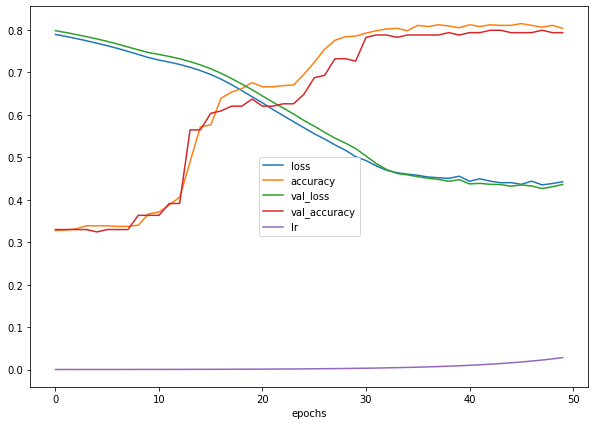

In [119]:
# Checkout the history
pd.DataFrame(history_4.history).plot(figsize=(10,7), xlabel="epochs");

In [120]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_5 = tf.keras.Sequential([
  #tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_5 = model_4.fit(x_train, y_train,
            validation_data=(x_test,y_test),
           # callbacks=[lr_scheduler],
            epochs=50)

Epoch 1/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4364 - accuracy: 0.8118 - val_loss: 0.4398 - val_accuracy: 0.7989
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8104 - val_loss: 0.4221 - val_accuracy: 0.7989
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.8104 - val_loss: 0.4262 - val_accuracy: 0.7989
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.8090 - val_loss: 0.4311 - val_accuracy: 0.7989
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8020 - val_loss: 0.4348 - val_accuracy: 0.7933
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8062 - val_loss: 0.4360 - val_accuracy: 0.7933
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8160 - val_loss: 0.4381 - val_accuracy: 0.7877
Epoch 8/50
23/23 [==

In [124]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_6 = tf.keras.Sequential([
  #tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_6 = model_6.fit(x_train, y_train,
            validation_data=(x_test,y_test),
            #callbacks=[lr_scheduler],
            epochs=10)

Epoch 1/10
23/23 [==============================] - 1s 8ms/step - loss: 0.5883 - accuracy: 0.6657 - val_loss: 0.5276 - val_accuracy: 0.7933
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7992 - val_loss: 0.4838 - val_accuracy: 0.7933
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7935 - val_loss: 0.4762 - val_accuracy: 0.7877
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7935 - val_loss: 0.4484 - val_accuracy: 0.7933
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.8076 - val_loss: 0.4485 - val_accuracy: 0.7933
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4639 - accuracy: 0.7823 - val_loss: 0.4379 - val_accuracy: 0.7989
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8090 - val_loss: 0.4572 - val_accuracy: 0.7821
Epoch 8/10
23/23 [==

In [148]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_7 = tf.keras.Sequential([
  #tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  #tf.keras.layers.Dense(1, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_7 = model_7.fit(x_train, y_train,
            validation_data=(x_test,y_test),
            #callbacks=[lr_scheduler],
            epochs=10)

Epoch 1/10
23/23 [==============================] - 1s 9ms/step - loss: 0.5883 - accuracy: 0.6657 - val_loss: 0.5276 - val_accuracy: 0.7933
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7992 - val_loss: 0.4838 - val_accuracy: 0.7933
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.7935 - val_loss: 0.4762 - val_accuracy: 0.7877
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7935 - val_loss: 0.4484 - val_accuracy: 0.7933
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.8076 - val_loss: 0.4485 - val_accuracy: 0.7933
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4639 - accuracy: 0.7823 - val_loss: 0.4379 - val_accuracy: 0.7989
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8090 - val_loss: 0.4572 - val_accuracy: 0.7821
Epoch 8/10
23/23 [==

In [149]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [153]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_8 = tf.keras.Sequential([
  #tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  #tf.keras.layers.Dense(1, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(0.02),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_8 = model_8.fit(x_train1, y_train1,
            validation_data=(x_test1,y_test1),
            #callbacks=[lr_scheduler],
            epochs=10)

Epoch 1/10
26/26 [==============================] - 1s 7ms/step - loss: 0.5922 - accuracy: 0.6704 - val_loss: 0.5308 - val_accuracy: 0.7667
Epoch 2/10
26/26 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7903 - val_loss: 0.4924 - val_accuracy: 0.8111
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7878 - val_loss: 0.4732 - val_accuracy: 0.8000
Epoch 4/10
26/26 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7915 - val_loss: 0.4738 - val_accuracy: 0.8111
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7890 - val_loss: 0.4685 - val_accuracy: 0.8222
Epoch 6/10
26/26 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7965 - val_loss: 0.4445 - val_accuracy: 0.8111
Epoch 7/10
26/26 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7928 - val_loss: 0.4630 - val_accuracy: 0.8222
Epoch 8/10
26/26 [==

In [156]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [175]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["Pclass", "SibSp", "Parch"]), # get all values between 0 and 1
    (OneHotEncoder(), ["Sex", "Embarked"])
)

# Create X & y
x2 = train_df.drop("Survived", axis=1)
y2 = train_df['Survived']

# Build our train and test sets (use random state to ensure same split as before)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.1, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x2_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x2_train_normal = ct.transform(x2_train)
x2_test_normal = ct.transform(x2_test)

In [173]:
x2_test

,Pclass,Sex,SibSp,Parch,Embarked
709,3,male,1,1,C
439,2,male,0,0,S
840,3,male,0,0,S
720,2,female,0,1,S
39,3,female,1,0,C
...,...,...,...,...,...
493,1,male,0,0,C
215,1,female,1,0,C
309,1,female,0,0,C
822,1,male,0,0,S


In [167]:
x2_test_normal.shape

(90, 8)

In [168]:
x2_test_normal = tf.convert_to_tensor(x2_test_normal, np.float32)

<tf.Tensor: shape=(90, 8), dtype=float32, numpy=
array([[1.        , 0.125     , 0.16666667, 0.        , 1.        ,
        1.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        ],
       [0.5       , 0.        , 0.16666667, 1.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.125     , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        ],
       [1.        , 0.25      , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 1. 

In [169]:
x2_train_normal = tf.convert_to_tensor(x2_train_normal, np.float32)

In [200]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_9 = tf.keras.Sequential([
  #tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1000, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
 #tf.keras.layers.Dense(1, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['accuracy'])

# Fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(x2_train_normal, y2_train,
            validation_data=(x2_test_normal,y2_test),
            #callbacks=[lr_scheduler],
            epochs=14)

Epoch 1/14
26/26 [==============================] - 1s 9ms/step - loss: 0.5430 - accuracy: 0.7678 - val_loss: 0.4129 - val_accuracy: 0.8222
Epoch 2/14
26/26 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.8040 - val_loss: 0.4417 - val_accuracy: 0.8222
Epoch 3/14
26/26 [==============================] - 0s 4ms/step - loss: 0.4530 - accuracy: 0.8140 - val_loss: 0.4874 - val_accuracy: 0.8111
Epoch 4/14
26/26 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.8015 - val_loss: 0.4166 - val_accuracy: 0.8333
Epoch 5/14
26/26 [==============================] - 0s 4ms/step - loss: 0.4684 - accuracy: 0.7953 - val_loss: 0.4199 - val_accuracy: 0.8222
Epoch 6/14
26/26 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8065 - val_loss: 0.4072 - val_accuracy: 0.8333
Epoch 7/14
26/26 [==============================] - 0s 4ms/step - loss: 0.4496 - accuracy: 0.8040 - val_loss: 0.4484 - val_accuracy: 0.8222
Epoch 8/14
26/26 [==

In [211]:
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [212]:
test_df = test_df.drop(columns=['Cabin','Age','Name','Ticket','Fare','PassengerId'])
test_df

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,0,0,Q
1,3,female,1,0,S
2,2,male,0,0,Q
3,3,male,0,0,S
4,3,female,1,1,S
...,...,...,...,...,...
413,3,male,0,0,S
414,1,female,0,0,C
415,3,male,0,0,S
416,3,male,0,0,S


In [213]:
test_df.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [214]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["Pclass", "SibSp", "Parch"]), # get all values between 0 and 1
    (OneHotEncoder(), ["Sex", "Embarked"])
)
x3 = test_df

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x3)
# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x3_normal = ct.transform(x3)
x3_normal

array([[1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.125     , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.125     , 0.11111111, ..., 1.        , 0.        ,
        0.        ]])

In [215]:
pred_probs = model_9.predict(x3_normal)
pred_probs

array([[0.07336649],
       [0.41939777],
       [0.10486978],
       [0.09197676],
       [0.4400853 ],
       [0.09197676],
       [0.8266395 ],
       [0.23677695],
       [0.7105144 ],
       [0.1004509 ],
       [0.09197676],
       [0.26794666],
       [0.9939499 ],
       [0.16409877],
       [0.9939499 ],
       [0.9362874 ],
       [0.10486978],
       [0.3128388 ],
       [0.41939777],
       [0.7105144 ],
       [0.48788133],
       [0.13806659],
       [0.9950147 ],
       [0.48975205],
       [0.98773843],
       [0.09731644],
       [0.9916959 ],
       [0.3128388 ],
       [0.26794666],
       [0.29725543],
       [0.16409877],
       [0.17008081],
       [0.43557566],
       [0.43557566],
       [0.48788133],
       [0.3128388 ],
       [0.46909407],
       [0.46909407],
       [0.09197676],
       [0.09197676],
       [0.36065805],
       [0.26794666],
       [0.09197676],
       [0.9547468 ],
       [0.9939499 ],
       [0.09197676],
       [0.48529962],
       [0.073

In [216]:
preds = pred_probs.round().astype(dtype=int)
preds

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [222]:
Survived = preds
Survived = pd.DataFrame(Survived)
Survived.head()

,0
0,0
1,0
2,0
3,0
4,0


In [223]:
test_df1 = pd.read_csv('test.csv')
test_df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [228]:
submission = pd.DataFrame()
submission['PassengerID'] = test_df1['PassengerId']
submission['Survived'] = Survived[0]
submission.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [237]:
submission.to_csv('Neural_Network_submission.csv',index=False)

In [236]:
submission['Survived'].value_counts()

0    302
1    116
Name: Survived, dtype: int64